In [2]:
import random
from typing import List

import cv2
import matplotlib.pyplot as plt
import pandas as pd

1. Making a dataframe with two columns.

In [3]:
df: pd.DataFrame = pd.read_csv('Annotasion.csv', usecols=[
                               'The Absolute Way', 'Class name'])
print(df)

                        The Absolute Way Class name
0     C:\pp var 4\dataset\tulip\0000.jpg      tulip
1      C:\pp var 4\dataset\rose\0000.jpg       rose
2     C:\pp var 4\dataset\tulip\0001.jpg      tulip
3      C:\pp var 4\dataset\rose\0001.jpg       rose
4     C:\pp var 4\dataset\tulip\0002.jpg      tulip
...                                  ...        ...
1995   C:\pp var 4\dataset\rose\0997.jpg       rose
1996  C:\pp var 4\dataset\tulip\0998.jpg      tulip
1997   C:\pp var 4\dataset\rose\0998.jpg       rose
1998  C:\pp var 4\dataset\tulip\0999.jpg      tulip
1999   C:\pp var 4\dataset\rose\0999.jpg       rose

[2000 rows x 2 columns]


2. Renaming this columns.

In [4]:
df: pd.DataFrame = df.rename(columns={'The Absolute Way': 'absPath',
                                      'Class name': 'className'})
print(df)

                                 absPath className
0     C:\pp var 4\dataset\tulip\0000.jpg     tulip
1      C:\pp var 4\dataset\rose\0000.jpg      rose
2     C:\pp var 4\dataset\tulip\0001.jpg     tulip
3      C:\pp var 4\dataset\rose\0001.jpg      rose
4     C:\pp var 4\dataset\tulip\0002.jpg     tulip
...                                  ...       ...
1995   C:\pp var 4\dataset\rose\0997.jpg      rose
1996  C:\pp var 4\dataset\tulip\0998.jpg     tulip
1997   C:\pp var 4\dataset\rose\0998.jpg      rose
1998  C:\pp var 4\dataset\tulip\0999.jpg     tulip
1999   C:\pp var 4\dataset\rose\0999.jpg      rose

[2000 rows x 2 columns]


3. Adding marks for each class of images.

In [5]:
df["marks"] = 0
df.loc[df["className"] == "rose", "marks"] = 1
print(df)

                                 absPath className  marks
0     C:\pp var 4\dataset\tulip\0000.jpg     tulip      0
1      C:\pp var 4\dataset\rose\0000.jpg      rose      1
2     C:\pp var 4\dataset\tulip\0001.jpg     tulip      0
3      C:\pp var 4\dataset\rose\0001.jpg      rose      1
4     C:\pp var 4\dataset\tulip\0002.jpg     tulip      0
...                                  ...       ...    ...
1995   C:\pp var 4\dataset\rose\0997.jpg      rose      1
1996  C:\pp var 4\dataset\tulip\0998.jpg     tulip      0
1997   C:\pp var 4\dataset\rose\0998.jpg      rose      1
1998  C:\pp var 4\dataset\tulip\0999.jpg     tulip      0
1999   C:\pp var 4\dataset\rose\0999.jpg      rose      1

[2000 rows x 3 columns]


4. Creating new columns with information about height, width and depth. If the image isn't correct for reading, writing it's path. (Helps to find broken images)

In [7]:
heightimg: List[int] = []
widthimg: List[int] = []
depthimg: List[int] = []

for i in range(df["absPath"].size):
    img = cv2.imread(df["absPath"].iloc[i])
    if img is not None:
        heightimg.append(img.shape[0])
        widthimg.append(img.shape[1])
        depthimg.append(img.shape[2])
    else:
        print(df["absPath"].iloc[i])
        # heightimg.append(0)
        # widthimg.append(0)
        # depthimg.append(0)
df["height"] = heightimg
df["width"] = widthimg
df["depth"] = depthimg
print(df)

                                 absPath className  marks  height  width  \
0     C:\pp var 4\dataset\tulip\0000.jpg     tulip      0    2146   3000   
1      C:\pp var 4\dataset\rose\0000.jpg      rose      1    1600   2400   
2     C:\pp var 4\dataset\tulip\0001.jpg     tulip      0    2000   3000   
3      C:\pp var 4\dataset\rose\0001.jpg      rose      1    1125   1500   
4     C:\pp var 4\dataset\tulip\0002.jpg     tulip      0    1346   2083   
...                                  ...       ...    ...     ...    ...   
1995   C:\pp var 4\dataset\rose\0997.jpg      rose      1     561    564   
1996  C:\pp var 4\dataset\tulip\0998.jpg     tulip      0    2000   3000   
1997   C:\pp var 4\dataset\rose\0998.jpg      rose      1     657    526   
1998  C:\pp var 4\dataset\tulip\0999.jpg     tulip      0     750    563   
1999   C:\pp var 4\dataset\rose\0999.jpg      rose      1     752    564   

      depth  
0         3  
1         3  
2         3  
3         3  
4         3  
...

5. Creating a statistical information for columns containing information about image dimensions (width, height, depth) and class labels.

In [8]:
marks_stats = df['marks'].describe()
height_stats = df['height'].describe()
width_stats = df['width'].describe()
depth_stats = df['depth'].describe()
print("\nstatistical information for marks\n", marks_stats)
print("\nstatistical information for height\n", height_stats)
print("\nstatistical information for width\n", width_stats)
print("\nstatistical information for depth\n", depth_stats)


statistical information for marks
 count    2000.000000
mean        0.500000
std         0.500125
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: marks, dtype: float64

statistical information for height
 count    2000.000000
mean     1449.197000
std       622.159315
min       164.000000
25%      1080.000000
50%      1278.000000
75%      1838.500000
max      7498.000000
Name: height, dtype: float64

statistical information for width
 count    2000.000000
mean     1928.212500
std       833.591089
min       186.000000
25%      1280.000000
50%      1920.000000
75%      2560.000000
max      8000.000000
Name: width, dtype: float64

statistical information for depth
 count    2000.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: depth, dtype: float64


6. Sorting the dataframe with certain mark

In [9]:
def filter_df(df: pd.DataFrame, mark: int) -> pd.DataFrame:
    df: pd.DataFrame = df[df.marks == mark]
    return df


print(filter_df(df, 1))

                                absPath className  marks  height  width  depth
1     C:\pp var 4\dataset\rose\0000.jpg      rose      1    1600   2400      3
3     C:\pp var 4\dataset\rose\0001.jpg      rose      1    1125   1500      3
5     C:\pp var 4\dataset\rose\0002.jpg      rose      1    1200   1920      3
7     C:\pp var 4\dataset\rose\0003.jpg      rose      1     764   1143      3
9     C:\pp var 4\dataset\rose\0004.jpg      rose      1    2250   3000      3
...                                 ...       ...    ...     ...    ...    ...
1991  C:\pp var 4\dataset\rose\0995.jpg      rose      1     800    480      3
1993  C:\pp var 4\dataset\rose\0996.jpg      rose      1    1002    564      3
1995  C:\pp var 4\dataset\rose\0997.jpg      rose      1     561    564      3
1997  C:\pp var 4\dataset\rose\0998.jpg      rose      1     657    526      3
1999  C:\pp var 4\dataset\rose\0999.jpg      rose      1     752    564      3

[1000 rows x 6 columns]


7. Sorting with certain width and height

In [10]:
def filter_df2(mark: int, max_width: int, max_height: int, df: pd.DataFrame) -> pd.DataFrame:
    df: pd.DataFrame = df[df.marks == mark][df.width <=
                                            max_width][df.height <= max_height]
    return df


print(filter_df2(1, 1500, 1500, df))

                                absPath className  marks  height  width  depth
3     C:\pp var 4\dataset\rose\0001.jpg      rose      1    1125   1500      3
7     C:\pp var 4\dataset\rose\0003.jpg      rose      1     764   1143      3
31    C:\pp var 4\dataset\rose\0015.jpg      rose      1     795   1200      3
51    C:\pp var 4\dataset\rose\0025.jpg      rose      1     799   1200      3
63    C:\pp var 4\dataset\rose\0031.jpg      rose      1    1024   1280      3
...                                 ...       ...    ...     ...    ...    ...
1991  C:\pp var 4\dataset\rose\0995.jpg      rose      1     800    480      3
1993  C:\pp var 4\dataset\rose\0996.jpg      rose      1    1002    564      3
1995  C:\pp var 4\dataset\rose\0997.jpg      rose      1     561    564      3
1997  C:\pp var 4\dataset\rose\0998.jpg      rose      1     657    526      3
1999  C:\pp var 4\dataset\rose\0999.jpg      rose      1     752    564      3

[348 rows x 6 columns]


C:\Users\toral\AppData\Local\Temp\ipykernel_6380\3038672297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df: pd.DataFrame = df[df.marks == mark][df.width <=
C:\Users\toral\AppData\Local\Temp\ipykernel_6380\3038672297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df: pd.DataFrame = df[df.marks == mark][df.width <=


8. Grouping the dataFrame by class label with calculation of the maximum, minimum and average values by the number of pixels

In [11]:
print(df)
df["pixel"] = df.height * df.width
result: pd.DataFrame = df.groupby("marks").agg(
    {"pixel": ['mean', 'min', 'max']})
print(result)

                                 absPath className  marks  height  width  \
0     C:\pp var 4\dataset\tulip\0000.jpg     tulip      0    2146   3000   
1      C:\pp var 4\dataset\rose\0000.jpg      rose      1    1600   2400   
2     C:\pp var 4\dataset\tulip\0001.jpg     tulip      0    2000   3000   
3      C:\pp var 4\dataset\rose\0001.jpg      rose      1    1125   1500   
4     C:\pp var 4\dataset\tulip\0002.jpg     tulip      0    1346   2083   
...                                  ...       ...    ...     ...    ...   
1995   C:\pp var 4\dataset\rose\0997.jpg      rose      1     561    564   
1996  C:\pp var 4\dataset\tulip\0998.jpg     tulip      0    2000   3000   
1997   C:\pp var 4\dataset\rose\0998.jpg      rose      1     657    526   
1998  C:\pp var 4\dataset\tulip\0999.jpg     tulip      0     750    563   
1999   C:\pp var 4\dataset\rose\0999.jpg      rose      1     752    564   

      depth  
0         3  
1         3  
2         3  
3         3  
4         3  
...

9. Creating a histogram

In [12]:
def histogram(df: pd.DataFrame, mark: int):
    new_df: pd.DataFrame = filter_df(df, mark)
    image_path: str = new_df["absPath"].iloc[random.randint(0, 1000)]
    image = cv2.imread(image_path)
    color = []
    for i in range(0, 3):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        color.append(histr)
    return color, image

10. Building the histogram

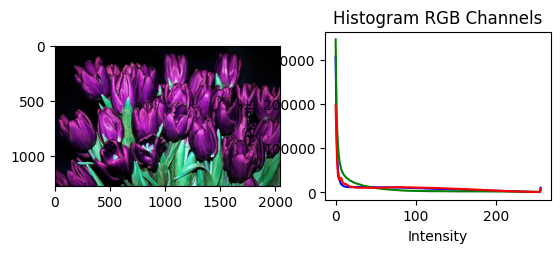

In [13]:
def rendering(df: pd.DataFrame, mark: int) -> None:
    histr, image = histogram(df, mark)

    plt.subplot(2, 2, 1)
    plt.imshow(image)

    plt.subplot(2, 2, 2)
    plt.plot(histr[0], color="b")
    plt.plot(histr[1], color="g")
    plt.plot(histr[2], color="r")
    plt.title("Histogram RGB Channels")
    plt.xlabel("Intensity")
    plt.ylabel("Pixels")
    plt.show()


rendering(df, 0)